In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
%matplotlib inline
from plyfile import PlyData, PlyElement
import pandas as pd

from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import operator

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
#C:\Users\USER\anaconda3\python.exe -m pip install --upgrade pip   =>how to update the new python version

In [3]:
#!pip install plyfile

In [49]:
#!pip install IPython

# Read Data

In [36]:
plydata = PlyData.read('earthquakes.ply')

In [37]:
print(plydata)

ply
format ascii 1.0
element vertex 521721
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header


In [38]:
plydata.elements[0]

PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar')), count=521721, comments=[])

# Compose Data

In [39]:
x = plydata.elements[0].data['x']
y = plydata.elements[0].data['y']
z = plydata.elements[0].data['z']

x = x[:,np.newaxis]
y = y[:,np.newaxis]
z = z[:,np.newaxis]

data = np.concatenate((x,y,z), axis=-1)

print(data.shape)


(521721, 3)


# Sampling

In [40]:
random_idx = np.random.choice(len(data), 10000, replace = False)

In [41]:
random_idx

array([104340, 423743, 357721, ..., 202417,  33163, 327470])

In [42]:
sampled_ply = data[random_idx]

In [43]:
sampled_ply

array([[-33.828426,  51.276234,   0.803087],
       [-38.274647,  -6.761872,  49.8912  ],
       [-40.964657,  30.76854 ,  20.327566],
       ...,
       [ 49.992886, -11.101465,  38.38579 ],
       [-18.657349, -46.074726,  39.9601  ],
       [ -0.436547,  63.6436  ,   2.644152]], dtype=float32)

In [44]:
df = pd.DataFrame(sampled_ply)

In [45]:
df

,0,1,2
0,-33.828426,51.276234,0.803087
1,-38.274647,-6.761872,49.891201
2,-40.964657,30.768539,20.327566
3,-36.975060,-8.275747,50.528839
4,19.933117,-49.652782,-34.953686
...,...,...,...
9995,22.312338,-54.443695,19.293884
9996,-39.505238,-1.212515,49.349701
9997,49.992886,-11.101465,38.385792
9998,-18.657349,-46.074726,39.960098


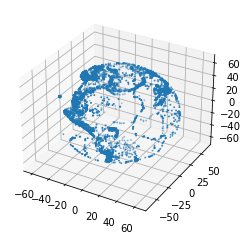

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df[0]
y = df[1]
z = df[2]


ax.scatter(df[0], df[1], df[2], s=0.8)

plt.show()

In [48]:
model_df = pd.DataFrame(columns = ['score', 'clusters'])

In [49]:
#Kmeans
#DBScan
#Aglomerative

model_perf_df = pd.DataFrame(columns=['score', 'clusters'], index=['KMeans', 'Aglomerative', 'DBScan'])
print(model_perf_df)

             score clusters
KMeans         NaN      NaN
Aglomerative   NaN      NaN
DBScan         NaN      NaN


In [50]:
%%time
silhouette_scores={}
for i in range (2,50):
    kmeans_model = KMeans(n_clusters=i)
    fitted_model = kmeans_model.fit(df)
    labels_kmeans = fitted_model.labels_
    s=metrics.silhouette_score(df, kmeans_model.labels_)
    silhouette_scores[i]=s

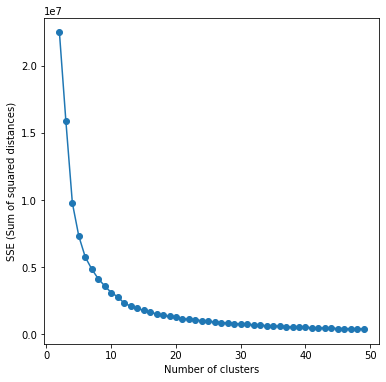

In [52]:
#pass
sse = []
list_k = np.arange(2,50,1)

X = sampled_ply # alias

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
   
plt.figure(figsize=(6,6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')

plt.show()

From the figure above, I could probably go with less clusters as the elbow is stronger somewhere between 10 and 20.

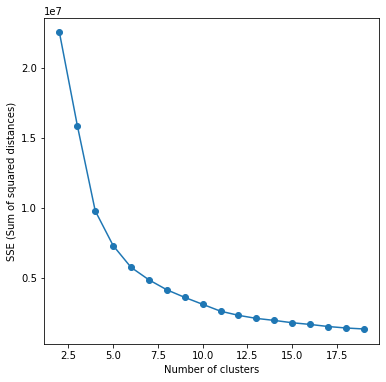

In [54]:
#pass
sse = []
list_k = np.arange(2,20,1)

X = sampled_ply # alias

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
   
plt.figure(figsize=(6,6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')

plt.show()

In [55]:
%%time
silhouette_scores={}
for i in range (2,20):
    kmeans_model = KMeans(n_clusters=i)
    fitted_model = kmeans_model.fit(df)
    labels_kmeans = fitted_model.labels_
    s=metrics.silhouette_score(df, kmeans_model.labels_)
    silhouette_scores[i]=s

Wall time: 44.5 s


In [56]:
best_kmeans = max(silhouette_scores.items(), key=operator.itemgetter(1))
best_kmeans
model_perf_df.loc['KMeans', 'score']=best_kmeans[1]
model_perf_df.loc['KMeans', 'clusters']=best_kmeans[0]

In [57]:
best_kmeans

(13, 0.58000374)

In [63]:
#Out of curiosity, but I would try other way with a specific numbers of clusters, following the elbow figure above
clustering = KMeans(n_clusters=10)
labels_df = clustering.fit(df).labels_
s_new=metrics.silhouette_score(df, clustering.labels_)
s_new

0.521942

I was wrong about 10 clusters, seems that best_kmeans works better :) 

### Visualisation KMeans

In [64]:
kmeans_model= KMeans(n_clusters=13)
fitted_model = kmeans_model.fit(df)
labels_kmeans = fitted_model.labels_

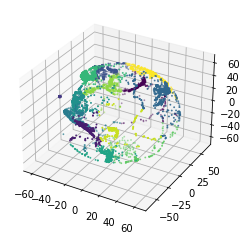

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0], df[1], df[2], s=0.8, c=labels_kmeans)
plt.show()

### Aglomerative Clustering

In [66]:
%%time
silhouette_scores={}
for i in range (2,50):
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_fit = agglo_model.fit(df)
    labels_aglo = agglo_fit.labels_
    s= metrics.silhouette_score(df, agglo_model.labels_)
    silhouette_scores[i]=s

Wall time: 5min 57s


In [67]:
# import operator
best_aglo=max(silhouette_scores.items(), key=operator.itemgetter(1))
best_aglo
model_perf_df.loc['Aglomerative', 'score']=best_aglo[1]
model_perf_df.loc['Aglomerative', 'clusters']=best_aglo[0]


In [68]:
best_aglo

(36, 0.5619086)

### Visualisation Aglomerative

In [69]:
aglo_model= AgglomerativeClustering(n_clusters=36)
fitted_model = aglo_model.fit(df)
labels_aglo = agglo_fit.labels_

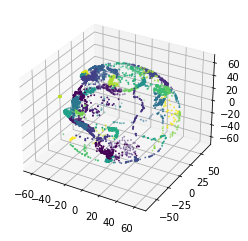

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0], df[1], df[2], s=0.8, c=labels_aglo)
plt.show()

### DBScan

In [72]:
%%time
db_scan_scores={}
for i in [0.1, 0.2, 0.3, 0.45, 0.5, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.7, 1.8, 2, 4]:
    for j in range (2, 30):
        dbscan_model = DBSCAN(eps=i, min_samples=j)
        dbscan_model_fit = dbscan_model.fit(df)
        labels_dbscan = dbscan_model_fit.labels_
        s=metrics.silhouette_score(df, dbscan_model.labels_)
        db_scan_scores[(i, j)]=s

Wall time: 19min 13s


In [73]:
best_db_scan = max(db_scan_scores.items(), key=operator.itemgetter(1))
best_db_scan
model_perf_df.loc['DBScan', 'score']=best_db_scan[1]
model_perf_df.loc['DBScan', 'clusters']=best_db_scan[0]

In [74]:
best_db_scan

((4, 26), 0.3574961)

In [ ]:
#So DBScan obicno ne rabotime na samples.

I took a bit higher sample, as I wanted to give DBScan chance to improve the result and analyze more instances, but again, I got the worst result. If I took the whole dataset, I should probably go on vacation while loading :)

### Visuelisation DBScan

In [75]:
db_scan_model= DBSCAN(eps=4, min_samples=26)
db_scan_model_fit = db_scan_model.fit(df)
labels_dbscan = db_scan_model_fit.labels_

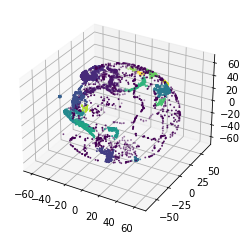

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0], df[1], df[2], s=0.8, c=labels_dbscan)
plt.show()

Too many outliers all around.

In [77]:
model_perf_df

,score,clusters
KMeans,0.580004,13
Aglomerative,0.561909,36
DBScan,0.357496,"(4, 26)"


Best results are obtained with KMeans clustering. The model predicts 15 clusters that are clearly distanced in the dataset. Aglomerative clustering gives also good results iwth 15 clusters. DBScan on the other hand perform poorly, it predicts 14 clusters, but not of the dataset is classified as outliers. It comes as a result of the different density of the dataset points.

### Conclusion

#### KMeans visuelisation

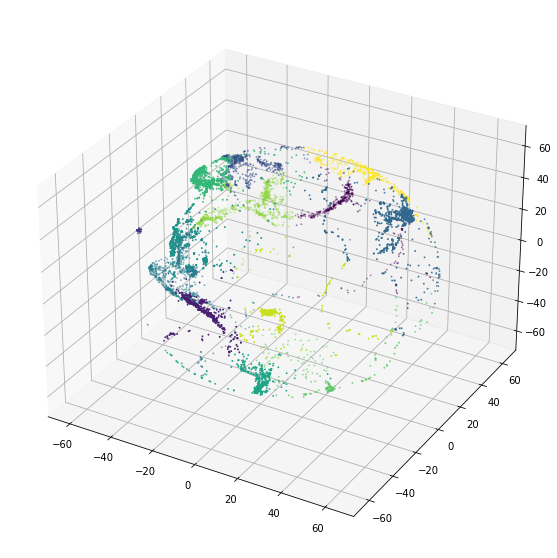

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0], df[1], df[2], s=0.8, c=labels_kmeans)
plt.show()

#### Aglomerative visuelisation

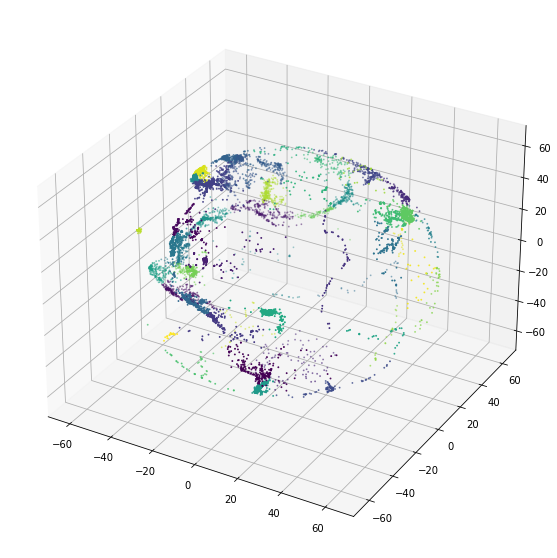

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0], df[1], df[2], s=0.8, c=labels_aglo)
plt.show()

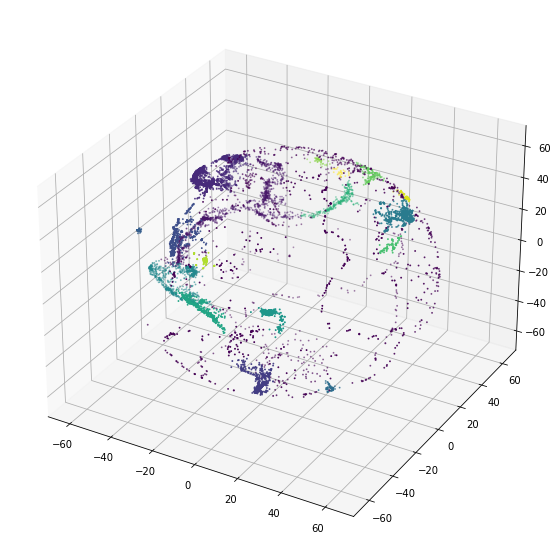

In [80]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0], df[1], df[2], s=0.8, c=labels_dbscan)
plt.show()

Even though KMeans is the fastest and simplest out of all tried algorighms, for this case it gives the best sil.score. From the 3d above, we can clearly see that aglomerative visuelization is considered with more outliers, compared with KMeans. Why KMeans in such case gave the best result, well, I suppose it's because of the isolated points in the dataset, that KMeans chose randomly to create the specific structure by weighting them.